## 1. Model setup

In [ ]:
import pandas as pd
import pymrio

exio3 = pymrio.parse_exiobase3(path="/Users/keijiarostegui/Documents/IOT_2022_pxp.zip")

# IOT_YYYY_ixi.zip - MRIO archive for Year YYYY in industry by industry format
# IOT_YYYY_pxp.zip - MRIO archive for Year YYYY in product by product format

#### Export to CSV

In [54]:
# # List of exio3 components to export
# components = {
#     "Z": exio3.Z,
#     "Y": exio3.Y,
#     "A": exio3.A,
#     "impacts_F": exio3.impacts.F,
#     "impacts_F_Y": exio3.impacts.F_Y,
#     "impacts_S": exio3.impacts.S,
#     "impacts_S_Y": exio3.impacts.S_Y,
#     "impacts_D_cba": exio3.impacts.D_cba,
#     "impacts_D_pba": exio3.impacts.D_pba,
#     "impacts_D_cba_reg": exio3.impacts.D_cba_reg,
#     "impacts_D_pba_reg": exio3.impacts.D_pba_reg,
#     "impacts_D_imp_reg": exio3.impacts.D_imp_reg,
#     "impacts_D_exp_reg": exio3.impacts.D_exp_reg,
#     "impacts_M": exio3.impacts.M
# }

# # Export each component to CSV
# for name, component in components.items():
#     # Convert to DataFrame (in case it's not already in DataFrame format)
#     component_df = pd.DataFrame(component)
    
#     # Define output path
#     output_path = f'{name}.csv'
    
#     # Export to CSV
#     component_df.to_csv(output_path)
#     print(f"{name} has been successfully exported to {output_path}")

#### Extensions

In [60]:
list(exio3.get_extensions())

['satellite', 'impacts']

#### Units

In [3]:
exio3.unit

unit
region sector                                                  
AT     Paddy rice                                         M.EUR
       Wheat                                              M.EUR
       Cereal grains nec                                  M.EUR
       Vegetables, fruit, nuts                            M.EUR
       Oil seeds                                          M.EUR
...                                                         ...
WM     Membership organisation services n.e.c. (91)       M.EUR
       Recreational, cultural and sporting services (92)  M.EUR
       Other services (93)                                M.EUR
       Private households with employed persons (95)      M.EUR
       Extra-territorial organizations and bodies         M.EUR

[9800 rows x 1 columns]

<!-- #### Sectors -->

#### Sectors

In [4]:
list(exio3.get_sectors())

['Paddy rice',
 'Wheat',
 'Cereal grains nec',
 'Vegetables, fruit, nuts',
 'Oil seeds',
 'Sugar cane, sugar beet',
 'Plant-based fibers',
 'Crops nec',
 'Cattle',
 'Pigs',
 'Poultry',
 'Meat animals nec',
 'Animal products nec',
 'Raw milk',
 'Wool, silk-worm cocoons',
 'Manure (conventional treatment)',
 'Manure (biogas treatment)',
 'Products of forestry, logging and related services (02)',
 'Fish and other fishing products; services incidental of fishing (05)',
 'Anthracite',
 'Coking Coal',
 'Other Bituminous Coal',
 'Sub-Bituminous Coal',
 'Patent Fuel',
 'Lignite/Brown Coal',
 'BKB/Peat Briquettes',
 'Peat',
 'Crude petroleum and services related to crude oil extraction, excluding surveying',
 'Natural gas and services related to natural gas extraction, excluding surveying',
 'Natural Gas Liquids',
 'Other Hydrocarbons',
 'Uranium and thorium ores (12)',
 'Iron ores',
 'Copper ores and concentrates',
 'Nickel ores and concentrates',
 'Aluminium ores and concentrates',
 'Precious

#### Regions

In [5]:
list(exio3.get_regions())

['AT',
 'BE',
 'BG',
 'CY',
 'CZ',
 'DE',
 'DK',
 'EE',
 'ES',
 'FI',
 'FR',
 'GR',
 'HR',
 'HU',
 'IE',
 'IT',
 'LT',
 'LU',
 'LV',
 'MT',
 'NL',
 'PL',
 'PT',
 'RO',
 'SE',
 'SI',
 'SK',
 'GB',
 'US',
 'JP',
 'CN',
 'CA',
 'KR',
 'BR',
 'IN',
 'MX',
 'RU',
 'AU',
 'CH',
 'TR',
 'TW',
 'NO',
 'ID',
 'ZA',
 'WA',
 'WL',
 'WE',
 'WF',
 'WM']

#### Final Consumers Categories

In [6]:
list(exio3.get_Y_categories())

['Final consumption expenditure by households',
 'Final consumption expenditure by non-profit organisations serving households (NPISH)',
 'Final consumption expenditure by government',
 'Gross fixed capital formation',
 'Changes in inventories',
 'Changes in valuables',
 'Exports: Total (fob)']

## 2. Database EDA

#### Intermediate Transactions Matrix

This provides a detailed view of inter-industry exchanges within and between regions, showing how the output of one sector supplies other sectors in the economy. This matrix is essential for understanding the direct dependencies between sectors in different regions, forming the basis for calculating the total requirements (both direct and indirect) needed to produce final goods and services.

In [56]:
exio3.Z

region                                                           AT  \
sector                                                   Paddy rice   
region sector                                                         
AT     Paddy rice                                                 0   
       Wheat                                                      0   
       Cereal grains nec                                          0   
       Vegetables, fruit, nuts                                    0   
       Oil seeds                                                  0   
...                                                             ...   
WM     Membership organisation services n.e.c. (91)               0   
       Recreational, cultural and sporting services (92)          0   
       Other services (93)                                        0   
       Private households with employed persons (95)              0   
       Extra-territorial organizations and bodies                 0   

region                                                                  \
sector                                                           Wheat   
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              1.242537e+01   
       Cereal grains nec                                  0.000000e+00   
       Vegetables, fruit, nuts                            0.000000e+00   
       Oil seeds                                          0.000000e+00   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       2.997715e-07   
       Recreational, cultural and sporting services (92)  2.870927e-04   
       Other services (93)                                2.667029e-05   
       Private households with employed persons (95)      0.000000e+00   
       Extra-territorial organizations and bodies         0.000000e+00   

region                                                                      \
sector                                                   Cereal grains nec   
region sector                                                                
AT     Paddy rice                                             0.000000e+00   
       Wheat                                                  0.000000e+00   
       Cereal grains nec                                      1.254405e+01   
       Vegetables, fruit, nuts                                0.000000e+00   
       Oil seeds                                              0.000000e+00   
...                                                                    ...   
WM     Membership organisation services n.e.c. (91)           6.240852e-07   
       Recreational, cultural and sporting services (92)      6.014181e-04   
       Other services (93)                                    5.551451e-05   
       Private households with employed persons (95)          0.000000e+00   
       Extra-territorial organizations and bodies             0.000000e+00   

region                                                                            \
sector                                                   Vegetables, fruit, nuts   
region sector                                                                      
AT     Paddy rice                                                       0.000000   
       Wheat                                                            0.000000   
       Cereal grains nec                                                0.000000   
       Vegetables, fruit, nuts                                        118.860777   
       Oil seeds                                                        0.000000   
...                                                                          ...   
WM     Membership organisation services n.e.c. (91)                     0.000001   
       Recreational, cultural and s

Example: Aluminium and aluminium products

Purchases of Inputs come from:

In [38]:
import pandas as pd

# Function to analyze top inputs for a selected region and sector in exio3.Z,
# showing the top 5 with their percentages and grouping the rest as "Others"
def analyze_top_inputs_with_percentage(Z, region, sector, top_n=10):
    # Select the column corresponding to the desired region and sector
    inputs = Z[(region, sector)]
    
    # Drop all zero values to keep only non-zero inputs
    non_zero_inputs = inputs[inputs != 0]
    
    # Sort the values in descending order and get the top N values
    top_inputs = non_zero_inputs.sort_values(ascending=False).head(top_n)
    
    # Calculate the total sum of all non-zero input values for the selected region and sector
    total_sum = non_zero_inputs.sum()
    
    # Calculate percentage for the top N inputs
    top_inputs_percentage = (top_inputs / total_sum) * 100
    
    # Calculate the sum and percentage for "Others" (all remaining inputs)
    others_sum = total_sum - top_inputs.sum()
    others_percentage = (others_sum / total_sum) * 100
    
    # Create a Series for "Others"
    others_series = pd.Series({"Others": others_sum})
    others_percentage_series = pd.Series({"Others": others_percentage})
    
    # Concatenate top inputs with "Others" row
    combined_inputs = pd.concat([top_inputs, others_series])
    combined_percentage = pd.concat([top_inputs_percentage, others_percentage_series])
    
    # Create a DataFrame with values and percentages
    result = pd.DataFrame({
        'Input Value': combined_inputs,
        'Percentage of Total (%)': combined_percentage
    })
    
    return result

# Example usage
region_to_study = "DE"  # Replace with the desired region code
sector_to_study = "Aluminium and aluminium products"  # Replace with the desired sector name

# Call the function and display the result
result = analyze_top_inputs_with_percentage(exio3.Z, region_to_study, sector_to_study, top_n=10)
print("Top 10 non-zero input values for the selected region and sector, with percentages:")
result


Top 10 non-zero input values for the selected region and sector, with percentages:


,Input Value,Percentage of Total (%)
"(DE, Other business services (74))",847.315811,5.441363
"(DE, Aluminium and aluminium products)",775.936293,4.982972
"(DE, Wholesale trade and commission trade services, except of motor vehicles and motorcycles (51))",676.762230,4.346088
"(DE, Other land transportation services)",596.236212,3.828959
"(DE, Secondary raw materials)",515.726673,3.311936
"(FR, Aluminium and aluminium products)",436.695400,2.804407
"(WA, Chemicals nec)",427.591033,2.745939
"(DE, Retail trade services, except of motor vehicles and motorcycles; repair services of personal and household goods (52))",407.140215,2.614607
"(IT, Aluminium and aluminium products)",392.433768,2.520164
"(RU, Other non-ferrous metal products)",369.759700,2.374553


In [44]:
# Function to create a Sankey diagram from the analysis results
def create_sankey_diagram(Z, region, sector, top_n=10):
    # Analyze the top inputs with percentage
    result = analyze_top_inputs_with_percentage(Z, region, sector, top_n)
    
    # Define nodes for the Sankey diagram
    source_labels = list(result.index)
    target_label = f"{region}, {sector}"
    
    # Create lists for source, target, and values for Sankey diagram
    labels = source_labels + [target_label]
    source = list(range(len(source_labels)))  # indexes of source nodes
    target = [len(source_labels)] * len(source_labels)  # index of the target node
    values = result['Input Value'].tolist()
    
    # Create the Sankey diagram using Plotly
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels
        ),
        link=dict(
            source=source,  # Source indices
            target=target,  # Target indices
            value=values    # Flow values
        )
    )])

    fig.update_layout(title_text=f"Sankey Diagram for {region} - {sector}", font_size=10)
    fig.show()

# Example usage
region_to_study = "DE"  # Replace with the desired region code
sector_to_study = "Aluminium and aluminium products"  # Replace with the desired sector name

# Generate and display the Sankey diagram
create_sankey_diagram(exio3.Z, region_to_study, sector_to_study, top_n=10)


#### Final Demand Matrix

Shows the final consumption of goods and services by end-users, such as households, governments, exports, and investments across regions.

In [9]:
exio3.Y

region                                                                                            AT  \
category                                                 Final consumption expenditure by households   
region sector                                                                                          
AT     Paddy rice                                                                           0.000000   
       Wheat                                                                               11.557135   
       Cereal grains nec                                                                  149.039220   
       Vegetables, fruit, nuts                                                            830.730691   
       Oil seeds                                                                            0.000000   
...                                                                                              ...   
WM     Membership organisation services n.e.c. (91)                                         0.002740   
       Recreational, cultural and sporting services (92)                                    0.000000   
       Other services (93)                                                                  3.880438   
       Private households with employed persons (95)                                       86.876855   
       Extra-territorial organizations and bodies                                           0.000000   

region                                                                                                                                         \
category                                                 Final consumption expenditure by non-profit organisations serving households (NPISH)   
region sector                                                                                                                                   
AT     Paddy rice                                                                                  0.000000                                     
       Wheat                                                                                       0.000000                                     
       Cereal grains nec                                                                           0.000000                                     
       Vegetables, fruit, nuts                                                                     0.000000                                     
       Oil seeds                                                                                   0.000000                                     
...                                                                                                     ...                                     
WM     Membership organisation services n.e.c. (91)                                                2.754945                                     
       Recreational, cultural and sporting services (92)                                           0.000000                                     
       Other services (93)                                                                         0.000000                                     
       Private households with employed persons (95)                                               0.000000                                     
       Extra-territorial organizations and bodies                                                  0.000000                                     

region                                                                                                \
category                                                 Final consumption expenditure by government   
region sector                                                                                          
AT     Paddy rice                                                                           0.000000   
       Wheat                                                                                0.00

Example: Aluminium and aluminium products

Sales outputs are used by:

In [10]:
import pandas as pd

# Function to filter non-zero final consumption values for a selected region and sector,
# return the top 5 with their percentages, and group the rest as "Others"
def filter_top_final_consumption_with_percentage(Y, region, sector, top_n=5):
    # Select the row corresponding to the desired region and sector
    final_consumption = Y.loc[(region, sector), :]
    
    # Drop all zero values to keep only non-zero final consumption values
    non_zero_final_consumption = final_consumption[final_consumption != 0]
    
    # Sort the values in descending order and get the top N values
    top_final_consumption = non_zero_final_consumption.sort_values(ascending=False).head(top_n)
    
    # Calculate the total sum of all non-zero final consumption values
    total_sum = non_zero_final_consumption.sum()
    
    # Calculate percentage for the top N values
    top_final_consumption_percentage = (top_final_consumption / total_sum) * 100
    
    # Calculate the sum and percentage for "Others" (all remaining values)
    others_sum = total_sum - top_final_consumption.sum()
    others_percentage = (others_sum / total_sum) * 100
    
    # Create a Series for "Others"
    others_series = pd.Series({"Others": others_sum})
    others_percentage_series = pd.Series({"Others": others_percentage})
    
    # Concatenate top final consumption with "Others" row
    combined_final_consumption = pd.concat([top_final_consumption, others_series])
    combined_percentage = pd.concat([top_final_consumption_percentage, others_percentage_series])
    
    # Create a DataFrame with values and percentages
    result = pd.DataFrame({
        'Final Consumption Value': combined_final_consumption,
        'Percentage of Total (%)': combined_percentage
    })
    
    return result

# Example usage
region_to_study = "DE"  # Replace with the desired region code
sector_to_study = "Aluminium and aluminium products"  # Replace with the desired sector name

# Call the function and display the result
result = filter_top_final_consumption_with_percentage(exio3.Y, region_to_study, sector_to_study, top_n=5)
print("Top 5 non-zero final consumption values connected to the selected region and sector, with percentages:")
result


Top 5 non-zero final consumption values connected to the selected region and sector, with percentages:


,Final Consumption Value,Percentage of Total (%)
"(DE, Changes in inventories)",163.927784,25.560864
"(IE, Changes in inventories)",114.012248,17.777655
"(DE, Gross fixed capital formation)",91.829391,14.318736
"(NL, Changes in inventories)",66.054023,10.299645
"(WE, Changes in inventories)",60.872438,9.491693
Others,144.627436,22.551408


#### Gross/total output.

In [11]:
exio3.x         

indout
region sector                                                         
AT     Paddy rice                                             0.000000
       Wheat                                                377.345553
       Cereal grains nec                                    889.257904
       Vegetables, fruit, nuts                             1635.677130
       Oil seeds                                            172.170051
...                                                                ...
WM     Membership organisation services n.e.c. (91)       23100.195712
       Recreational, cultural and sporting services (92)  59039.178328
       Other services (93)                                36636.962923
       Private households with employed persons (95)       6818.207021
       Extra-territorial organizations and bodies             0.000000

[9800 rows x 1 columns]

#### Technical coefficients Matrix

- **exio3.A** shows the direct input requirements per unit of output for each sector in each region. 
- It indicates the proportion of input from one sector needed to produce a single unit of output in another sector, helping to analyze sectoral dependencies and production structure.

In [12]:
exio3.A

region                                                           AT  \
sector                                                   Paddy rice   
region sector                                                         
AT     Paddy rice                                                 0   
       Wheat                                                      0   
       Cereal grains nec                                          0   
       Vegetables, fruit, nuts                                    0   
       Oil seeds                                                  0   
...                                                             ...   
WM     Membership organisation services n.e.c. (91)               0   
       Recreational, cultural and sporting services (92)          0   
       Other services (93)                                        0   
       Private households with employed persons (95)              0   
       Extra-territorial organizations and bodies                 0   

region                                                                  \
sector                                                           Wheat   
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              3.292837e-02   
       Cereal grains nec                                  0.000000e+00   
       Vegetables, fruit, nuts                            0.000000e+00   
       Oil seeds                                          0.000000e+00   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       7.944217e-10   
       Recreational, cultural and sporting services (92)  7.608218e-07   
       Other services (93)                                7.067870e-08   
       Private households with employed persons (95)      0.000000e+00   
       Extra-territorial organizations and bodies         0.000000e+00   

region                                                                      \
sector                                                   Cereal grains nec   
region sector                                                                
AT     Paddy rice                                             0.000000e+00   
       Wheat                                                  0.000000e+00   
       Cereal grains nec                                      1.410620e-02   
       Vegetables, fruit, nuts                                0.000000e+00   
       Oil seeds                                              0.000000e+00   
...                                                                    ...   
WM     Membership organisation services n.e.c. (91)           7.018045e-10   
       Recreational, cultural and sporting services (92)      6.763146e-07   
       Other services (93)                                    6.242791e-08   
       Private households with employed persons (95)          0.000000e+00   
       Extra-territorial organizations and bodies             0.000000e+00   

region                                                                            \
sector                                                   Vegetables, fruit, nuts   
region sector                                                                      
AT     Paddy rice                                                   0.000000e+00   
       Wheat                                                        0.000000e+00   
       Cereal grains nec                                            0.000000e+00   
       Vegetables, fruit, nuts                                      7.266763e-02   
       Oil seeds                                                    0.000000e+00   
...                                                                          ...   
WM     Membership organisation services n.e.c. (91)                 7.374026e-10   
       Recreational, cultural and s

In [13]:
# import pandas as pd

# # Function to analyze top inputs for a selected region and sector in exio3.A,
# # showing the top 10 with their percentages and grouping the rest as "Others"
# def analyze_top_inputs_with_percentage_A(A, region, sector, top_n=10):
#     # Select the column corresponding to the desired region and sector
#     inputs = A[(region, sector)]
    
#     # Drop all zero values to keep only non-zero input coefficients
#     non_zero_inputs = inputs[inputs != 0]
    
#     # Sort the values in descending order and get the top N values
#     top_inputs = non_zero_inputs.sort_values(ascending=False).head(top_n)
    
#     # Calculate the total sum of all non-zero input coefficients for the selected region and sector
#     total_sum = non_zero_inputs.sum()
    
#     # Calculate percentage for the top N inputs
#     top_inputs_percentage = (top_inputs / total_sum) * 100
    
#     # Calculate the sum and percentage for "Others" (all remaining inputs)
#     others_sum = total_sum - top_inputs.sum()
#     others_percentage = (others_sum / total_sum) * 100
    
#     # Create a Series for "Others"
#     others_series = pd.Series({"Others": others_sum})
#     others_percentage_series = pd.Series({"Others": others_percentage})
    
#     # Concatenate top inputs with "Others" row
#     combined_inputs = pd.concat([top_inputs, others_series])
#     combined_percentage = pd.concat([top_inputs_percentage, others_percentage_series])
    
#     # Create a DataFrame with values and percentages
#     result = pd.DataFrame({
#         'Input Coefficient': combined_inputs,
#         'Percentage of Total (%)': combined_percentage
#     })
    
#     return result

# # Example usage
# region_to_study = "DE"  # Replace with the desired region code
# sector_to_study = "Aluminium and aluminium products"  # Replace with the desired sector name

# # Call the function and display the result
# result = analyze_top_inputs_with_percentage_A(exio3.A, region_to_study, sector_to_study, top_n=10)
# print("Top 10 non-zero input coefficients for the selected region and sector, with percentages:")
# result


## 3. Impacts

Characterized stressors - e.g. total GWP100, total land use, etc

#### Units

In [14]:
exio3.impacts.unit                                 # Units

,unit
impact,
Value Added,M.EUR
Employment,1000 p.
Employment hour,hr
"GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)",kg CO2 eq.
"Human toxicity (USEtox) | USEtox2008 | CTUh (Rosenbaum et al., 2008)",cases
...,...
Unused Domestic Extraction - Oil and Gas,kt
Unused Domestic Extraction - Non-metalic Minerals,kt
Unused Domestic Extraction - Iron Ore,kt


#### Impacts list

In [15]:
list(exio3.impacts.get_rows())                     # Impacts list

['Value Added',
 'Employment',
 'Employment hour',
 'GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)',
 'Human toxicity (USEtox) | USEtox2008 | CTUh (Rosenbaum et al., 2008)',
 'Fresh water Ecotoxicity (USEtox) | USEtox2008 | CTUe (Rosenbaum et al., 2008)',
 'EPS | Damage Approach | EPS (Steen, 1999))',
 'Carcinogenic effects on humans (H.A) | ECOINDICATOR 99 (H.A) | Carcinogenic effects on humans (H.A)',
 'Respiratory effects on humans caused by organic substances (H.A) | ECOINDICATOR 99 (H.A) | Respiratory effects on humans caused by organic substances (H.A)',
 'Respiratory effects on humans caused by inorganic substances (H.A) | ECOINDICATOR 99 (H.A) | Respiratory effects on humans caused by inorganic substances (H.A)',
 'Damages to human health caused by climate change (H.A) | ECOINDICATOR 99 (H.A) | Damages to human health caused by climate change (H.A)',
 'Damage to Ecosystem Quality caused by ecotoxic emissions (H.A) | ECOINDICATOR 

#### Total Impact Matrix

- **exio3.impacts.F** shows the total environmental and socio-economic impacts associated with each sector’s production activities across different regions. 
- This matrix captures both the direct impacts generated by the sector’s own activities and the indirect impacts from upstream suppliers in the supply chain. 
- It provides a comprehensive view of the full footprint (e.g., CO₂ emissions, water use) associated with each sector, taking into account all upstream contributions needed to produce its output.

In [16]:
exio3.impacts.F

region                                                     AT                \
sector                                             Paddy rice         Wheat   
impact                                                                        
Value Added                                                 0  2.520345e+02   
Employment                                                  0  7.920700e+00   
Employment hour                                             0  1.649994e+07   
GHG emissions (GWP100) | Problem oriented appro...          0  6.233148e+08   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...          0  2.281079e+00   
...                                                       ...           ...   
Unused Domestic Extraction - Oil and Gas                    0  0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals           0  0.000000e+00   
Unused Domestic Extraction - Iron Ore                       0  0.000000e+00   
Unused Domestic Extraction - Non-ferous metal ores          0  0.000000e+00   
Land use Crop, Forest, Pasture                              0  2.102154e+03   

region                                                                \
sector                                             Cereal grains nec   
impact                                                                 
Value Added                                             6.771235e+02   
Employment                                              1.328721e+01   
Employment hour                                         2.900755e+07   
GHG emissions (GWP100) | Problem oriented appro...      7.646607e+08   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...      1.799501e+00   
...                                                              ...   
Unused Domestic Extraction - Oil and Gas                0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals       0.000000e+00   
Unused Domestic Extraction - Iron Ore                   0.000000e+00   
Unused Domestic Extraction - Non-ferous metal ores      0.000000e+00   
Land use Crop, Forest, Pasture                          4.450491e+03   

region                                                                      \
sector                                             Vegetables, fruit, nuts   
impact                                                                       
Value Added                                                   1.138192e+03   
Employment                                                    3.279869e+01   
Employment hour                                               7.618395e+07   
GHG emissions (GWP100) | Problem oriented appro...            3.024972e+08   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...            9.917277e-01   
...                                                                    ...   
Unused Domestic Extraction - Oil and Gas                      0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals             0.000000e+00   
Unused Domestic Extraction - Iron Ore                         0.000000e+00   
Unused Domestic Extraction - Non-ferous metal ores            0.000000e+00   
Land use Crop, Forest, Pasture                                1.526766e+03   

region                                                            \
sector                                                 Oil seeds   
impact                                                             
Value Added                                         1.413628e+02   
Employment                                          4.656948e+00   
Employment hour                                     1.085947e+07   
GHG emissions (GWP100) | Problem oriented appro...  2.244329e+08   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...  5.739757e-01   
...                                                          ...   
Unused Domestic Extraction - Oil and Gas            0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals   0.000000e+00   
Unused Domestic Extraction - Iron Ore      

#### Final Demand Impact Matrix

- Each entry in exio3.impacts.F_Y reflects the environmental and socio-economic impacts associated **only with the final consumption of goods and services**, as represented in exio3.Y.

In [17]:
exio3.impacts.F_Y

region                                                                                      AT  \
category                                           Final consumption expenditure by households   
impact                                                                                           
Value Added                                                                       0.000000e+00   
Employment                                                                        0.000000e+00   
Employment hour                                                                   0.000000e+00   
GHG emissions (GWP100) | Problem oriented appro...                                1.349382e+10   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                                1.766128e+02   
...                                                                                        ...   
Unused Domestic Extraction - Oil and Gas                                          0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals                                 0.000000e+00   
Unused Domestic Extraction - Iron Ore                                             0.000000e+00   
Unused Domestic Extraction - Non-ferous metal ores                                0.000000e+00   
Land use Crop, Forest, Pasture                                                    3.083517e+03   

region                                                                                                                                   \
category                                           Final consumption expenditure by non-profit organisations serving households (NPISH)   
impact                                                                                                                                    
Value Added                                                                              0.000000e+00                                     
Employment                                                                               0.000000e+00                                     
Employment hour                                                                          0.000000e+00                                     
GHG emissions (GWP100) | Problem oriented appro...                                       5.068950e+08                                     
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                                       7.579156e-01                                     
...                                                                                               ...                                     
Unused Domestic Extraction - Oil and Gas                                                 0.000000e+00                                     
Unused Domestic Extraction - Non-metalic Minerals                                        0.000000e+00                                     
Unused Domestic Extraction - Iron Ore                                                    0.000000e+00                                     
Unused Domestic Extraction - Non-ferous metal ores                                       0.000000e+00                                     
Land use Crop, Forest, Pasture                                                           0.000000e+00                                     

region                                                                                          \
category                                           Final consumption expenditure by government   
impact                                                                                           
Value Added                                                                       0.000000e+00   
Employment                                                                        0.000000e+00   
Employment hour                                                                   0.000000e+00   
GHG emissions (GWP100) | Problem oriented appro...                                6.390982e+

#### Direct environmental impacts per unit of output

- **exio3.impacts.S** captures the direct environmental and socio-economic impacts per unit of output for each sector in each region. 
- This matrix represents direct impact intensities, meaning it shows the impact generated directly by the activities of each sector without accounting for any upstream or downstream effects in the supply chain. 
- It provides a baseline measurement of sector-specific impacts, representing the direct contribution of a sector's activities to various environmental and socio-economic indicators (e.g., CO₂ emissions, water use, employment) before considering indirect contributions from other sectors.

Example:

If exio3.impacts.S shows 300 kg of CO₂ emissions per million euros for the "Steel Manufacturing" sector in Japan, this means that 300 kg of CO₂ is emitted directly by the steel manufacturing sector in Japan per million euros of its output. This value does not include emissions from any other sectors that supply materials to steel manufacturing or any sectors that use steel as an input.

In [18]:
exio3.impacts.S 

region                                                     AT                \
sector                                             Paddy rice         Wheat   
impact                                                                        
Value Added                                                 0  6.679143e-01   
Employment                                                  0  2.099057e-02   
Employment hour                                             0  4.372635e+04   
GHG emissions (GWP100) | Problem oriented appro...          0  1.651841e+06   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...          0  6.045068e-03   
...                                                       ...           ...   
Unused Domestic Extraction - Oil and Gas                    0  0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals           0  0.000000e+00   
Unused Domestic Extraction - Iron Ore                       0  0.000000e+00   
Unused Domestic Extraction - Non-ferous metal ores          0  0.000000e+00   
Land use Crop, Forest, Pasture                              0  5.570898e+00   

region                                                                \
sector                                             Cereal grains nec   
impact                                                                 
Value Added                                                 0.761448   
Employment                                                  0.014942   
Employment hour                                         32619.949021   
GHG emissions (GWP100) | Problem oriented appro...     859886.268775   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...          0.002024   
...                                                              ...   
Unused Domestic Extraction - Oil and Gas                    0.000000   
Unused Domestic Extraction - Non-metalic Minerals           0.000000   
Unused Domestic Extraction - Iron Ore                       0.000000   
Unused Domestic Extraction - Non-ferous metal ores          0.000000   
Land use Crop, Forest, Pasture                              5.004724   

region                                                                      \
sector                                             Vegetables, fruit, nuts   
impact                                                                       
Value Added                                                       0.695854   
Employment                                                        0.020052   
Employment hour                                               46576.401585   
GHG emissions (GWP100) | Problem oriented appro...           184936.984090   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                0.000606   
...                                                                    ...   
Unused Domestic Extraction - Oil and Gas                          0.000000   
Unused Domestic Extraction - Non-metalic Minerals                 0.000000   
Unused Domestic Extraction - Iron Ore                             0.000000   
Unused Domestic Extraction - Non-ferous metal ores                0.000000   
Land use Crop, Forest, Pasture                                    0.933415   

region                                                            \
sector                                                 Oil seeds   
impact                                                             
Value Added                                         8.210652e-01   
Employment                                          2.704854e-02   
Employment hour                                     6.307407e+04   
GHG emissions (GWP100) | Problem oriented appro...  1.303554e+06   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...  3.333772e-03   
...                                                          ...   
Unused Domestic Extraction - Oil and Gas            0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals   0.000000e+00   
Unused Domestic Extraction - Iron Ore      

#### Direct impacts of final demand only

- This provides direct impact intensities associated with final demand, such as household consumption, government spending, investments, and exports. 
- Unlike exio3.impacts.S, which includes all direct impacts of sector outputs, exio3.impacts.S_Y isolates the portion of impacts that are directly due to final consumption, excluding impacts from intermediate production. 
- It’s particularly useful when you want to see the immediate effects of final consumption activities without tracing the full supply chain.

In [19]:
exio3.impacts.S_Y

region                                                                                      AT  \
category                                           Final consumption expenditure by households   
impact                                                                                           
Value Added                                                                           0.000000   
Employment                                                                            0.000000   
Employment hour                                                                       0.000000   
GHG emissions (GWP100) | Problem oriented appro...                                66164.543463   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                                    0.000866   
...                                                                                        ...   
Unused Domestic Extraction - Oil and Gas                                              0.000000   
Unused Domestic Extraction - Non-metalic Minerals                                     0.000000   
Unused Domestic Extraction - Iron Ore                                                 0.000000   
Unused Domestic Extraction - Non-ferous metal ores                                    0.000000   
Land use Crop, Forest, Pasture                                                        0.015119   

region                                                                                                                                   \
category                                           Final consumption expenditure by non-profit organisations serving households (NPISH)   
impact                                                                                                                                    
Value Added                                                                                  0.000000                                     
Employment                                                                                   0.000000                                     
Employment hour                                                                              0.000000                                     
GHG emissions (GWP100) | Problem oriented appro...                                       43345.051076                                     
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                                           0.000065                                     
...                                                                                               ...                                     
Unused Domestic Extraction - Oil and Gas                                                     0.000000                                     
Unused Domestic Extraction - Non-metalic Minerals                                            0.000000                                     
Unused Domestic Extraction - Iron Ore                                                        0.000000                                     
Unused Domestic Extraction - Non-ferous metal ores                                           0.000000                                     
Land use Crop, Forest, Pasture                                                               0.000000                                     

region                                                                                          \
category                                           Final consumption expenditure by government   
impact                                                                                           
Value Added                                                                           0.000000   
Employment                                                                            0.000000   
Employment hour                                                                       0.000000   
GHG emissions (GWP100) | Problem oriented appro...                                 7878.5236

#### Domestic Consumption-Based Accounting (D CBA) Impacts

- This provides a consumption-based view of impacts. 
- It quantifies the environmental and socio-economic impacts associated with all goods and services consumed within a region, regardless of where those goods were produced. 
- This matrix is useful for understanding the impact driven by a region’s consumption, including imported goods and services, making it especially relevant for policies focused on sustainable consumption.

In [20]:
exio3.impacts.D_cba

region                                                        AT  \
sector                                                Paddy rice   
impact                                                             
Value Added                                         4.399664e-01   
Employment                                          2.422902e-01   
Employment hour                                     4.540924e+05   
GHG emissions (GWP100) | Problem oriented appro...  5.022287e+06   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...  9.550290e-02   
...                                                          ...   
Unused Domestic Extraction - Oil and Gas            4.878618e-03   
Unused Domestic Extraction - Non-metalic Minerals   6.628383e-03   
Unused Domestic Extraction - Iron Ore               3.640010e-03   
Unused Domestic Extraction - Non-ferous metal ores  1.431193e-02   
Land use Crop, Forest, Pasture                      7.817868e+00   

region                                                            \
sector                                                     Wheat   
impact                                                             
Value Added                                         1.772755e+02   
Employment                                          1.046132e+01   
Employment hour                                     2.106184e+07   
GHG emissions (GWP100) | Problem oriented appro...  3.308955e+08   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...  2.029941e+01   
...                                                          ...   
Unused Domestic Extraction - Oil and Gas            3.519930e+00   
Unused Domestic Extraction - Non-metalic Minerals   4.661242e+00   
Unused Domestic Extraction - Iron Ore               1.243954e+00   
Unused Domestic Extraction - Non-ferous metal ores  1.291077e+01   
Land use Crop, Forest, Pasture                      2.772650e+03   

region                                                                \
sector                                             Cereal grains nec   
impact                                                                 
Value Added                                             3.775758e+02   
Employment                                              2.038262e+01   
Employment hour                                         3.953909e+07   
GHG emissions (GWP100) | Problem oriented appro...      4.384095e+08   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...      3.577662e+01   
...                                                              ...   
Unused Domestic Extraction - Oil and Gas                5.980025e+00   
Unused Domestic Extraction - Non-metalic Minerals       9.618876e+00   
Unused Domestic Extraction - Iron Ore                   2.134350e+00   
Unused Domestic Extraction - Non-ferous metal ores      1.625659e+01   
Land use Crop, Forest, Pasture                          3.028814e+03   

region                                                                      \
sector                                             Vegetables, fruit, nuts   
impact                                                                       
Value Added                                                   2.325923e+03   
Employment                                                    3.395005e+02   
Employment hour                                               7.510774e+08   
GHG emissions (GWP100) | Problem oriented appro...            9.580319e+08   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...            2.417848e+02   
...                                                                    ...   
Unused Domestic Extraction - Oil and Gas                      1.578784e+01   
Unused Domestic Extraction - Non-metalic Minerals             6.456177e+01   
Unused Domestic Extraction - Iron Ore                         1.368099e+01   
Unused Domestic Extraction - Non-ferous metal ores            4.846451e+01   
Land use Crop, Forest, Pasture                                5.561323e

#### Domestic Production-Based Accounting (D PBA) Impacts

- This provides a production-based view of impacts. 
- It quantifies the environmental and socio-economic impacts associated with all goods and services produced within a region, regardless of whether these goods are consumed domestically or exported. 
- This matrix is useful for understanding the total impact generated by a region’s production activities, which is important for regions that want to manage the environmental footprint of their industries and exports.

In [21]:
exio3.impacts.D_pba

region                                                     AT                \
sector                                             Paddy rice         Wheat   
impact                                                                        
Value Added                                                 0  2.520345e+02   
Employment                                                  0  7.920700e+00   
Employment hour                                             0  1.649994e+07   
GHG emissions (GWP100) | Problem oriented appro...          0  6.233148e+08   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...          0  2.281079e+00   
...                                                       ...           ...   
Unused Domestic Extraction - Oil and Gas                    0  0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals           0  0.000000e+00   
Unused Domestic Extraction - Iron Ore                       0  0.000000e+00   
Unused Domestic Extraction - Non-ferous metal ores          0  0.000000e+00   
Land use Crop, Forest, Pasture                              0  2.102154e+03   

region                                                                \
sector                                             Cereal grains nec   
impact                                                                 
Value Added                                             6.771235e+02   
Employment                                              1.328721e+01   
Employment hour                                         2.900755e+07   
GHG emissions (GWP100) | Problem oriented appro...      7.646607e+08   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...      1.799501e+00   
...                                                              ...   
Unused Domestic Extraction - Oil and Gas                0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals       0.000000e+00   
Unused Domestic Extraction - Iron Ore                   0.000000e+00   
Unused Domestic Extraction - Non-ferous metal ores      0.000000e+00   
Land use Crop, Forest, Pasture                          4.450491e+03   

region                                                                      \
sector                                             Vegetables, fruit, nuts   
impact                                                                       
Value Added                                                   1.138192e+03   
Employment                                                    3.279869e+01   
Employment hour                                               7.618395e+07   
GHG emissions (GWP100) | Problem oriented appro...            3.024972e+08   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...            9.917277e-01   
...                                                                    ...   
Unused Domestic Extraction - Oil and Gas                      0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals             0.000000e+00   
Unused Domestic Extraction - Iron Ore                         0.000000e+00   
Unused Domestic Extraction - Non-ferous metal ores            0.000000e+00   
Land use Crop, Forest, Pasture                                1.526766e+03   

region                                                            \
sector                                                 Oil seeds   
impact                                                             
Value Added                                         1.413628e+02   
Employment                                          4.656948e+00   
Employment hour                                     1.085947e+07   
GHG emissions (GWP100) | Problem oriented appro...  2.244329e+08   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...  5.739757e-01   
...                                                          ...   
Unused Domestic Extraction - Oil and Gas            0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals   0.000000e+00   
Unused Domestic Extraction - Iron Ore      

#### Regional Consumption-Based Accounting (CBA) Impacts

This matrix provides insights into the total environmental and socio-economic impacts of goods and services consumed within a region.

In [22]:
exio3.impacts.D_cba_reg

,AT,BE,BG,CY,CZ,DE,DK,EE,ES,FI,...,TR,TW,NO,ID,ZA,WA,WL,WE,WF,WM
impact,,,,,,,,,,,,,,,,,,,,,
Value Added,4.029981e+05,4.936541e+05,6.480562e+04,2.398416e+04,2.294583e+05,3.409527e+06,3.062485e+05,3.016835e+04,1.264158e+06,2.504082e+05,...,7.467980e+05,4.730063e+05,3.707447e+05,1.164813e+06,3.263952e+05,4.023225e+06,2.328410e+06,4.257688e+05,1.893966e+06,3.151410e+06
Employment,8.465534e+03,1.358156e+04,4.089088e+03,4.874828e+02,7.689773e+03,7.931171e+04,5.359366e+03,1.296163e+03,3.162144e+04,4.574578e+03,...,3.003961e+04,2.194793e+04,6.015463e+03,1.672330e+05,1.609536e+04,4.399671e+05,1.126636e+05,1.352344e+05,4.096026e+05,9.543121e+04
Employment hour,1.567646e+10,2.694148e+10,8.513195e+09,9.929629e+08,1.505275e+10,1.383503e+11,1.087049e+10,2.655670e+09,6.458040e+10,9.216147e+09,...,7.097665e+10,4.521525e+10,1.207930e+10,3.595305e+11,3.521620e+10,9.099213e+11,2.581105e+11,2.715898e+11,9.185712e+11,2.220474e+11
"GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)",1.186026e+11,1.963212e+11,4.416979e+10,1.446533e+10,1.431098e+11,1.177087e+12,8.343560e+10,1.756723e+10,4.179158e+11,7.791798e+10,...,6.292716e+11,2.987931e+11,9.106076e+10,1.173850e+12,3.373182e+11,3.645468e+12,1.432638e+12,6.047704e+11,2.859910e+12,2.744822e+12
"Human toxicity (USEtox) | USEtox2008 | CTUh (Rosenbaum et al., 2008)",5.475518e+04,1.170067e+05,1.716734e+04,3.613217e+04,4.226469e+04,6.748113e+05,1.165676e+05,6.195058e+03,1.987693e+05,4.277670e+04,...,3.391768e+05,1.846326e+05,1.265432e+05,6.657338e+05,1.422194e+05,2.033617e+06,1.837163e+06,3.810127e+05,1.455022e+06,1.543439e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unused Domestic Extraction - Oil and Gas,2.722333e+03,4.732349e+03,8.387195e+02,2.352501e+01,3.635981e+03,2.551835e+04,1.986925e+03,1.408300e+02,9.876268e+03,1.471810e+03,...,1.023476e+04,7.404481e+03,4.438840e+03,1.367057e+04,4.099145e+03,7.577757e+04,3.843148e+04,2.140442e+04,4.052574e+04,7.966740e+04
Unused Domestic Extraction - Non-metalic Minerals,1.490935e+04,5.217894e+04,1.024540e+03,2.327250e+02,3.800920e+03,1.396582e+05,5.319970e+03,4.697402e+02,3.425490e+04,1.650413e+04,...,1.596065e+04,8.685645e+03,9.569666e+03,2.496832e+04,2.334910e+04,1.764832e+05,4.852141e+04,1.188470e+04,1.370372e+05,1.740593e+05
Unused Domestic Extraction - Iron Ore,4.314875e+03,7.633006e+03,4.952448e+02,5.491627e+01,2.479578e+03,3.277741e+04,1.952949e+03,1.779779e+02,1.095998e+04,1.817650e+03,...,1.263531e+04,3.264137e+04,3.141090e+03,2.710560e+04,9.962056e+03,2.089711e+05,5.654186e+04,3.971875e+04,6.215748e+04,1.096671e+05


#### Regional Production-Based Accounting (PBA) Impacts

- This matrix provides a regional breakdown of the production-based environmental and socio-economic impacts for each producing region. 
- It shows the total impacts associated with the production activities within each region, broken down to indicate where these impacts support both domestic consumption and exports to other regions.

In [23]:
exio3.impacts.D_pba_reg                            # Production-based accounts per region in the year. This represents total impact from production activities within regions for the specified time period.

,AT,BE,BG,CY,CZ,DE,DK,EE,ES,FI,...,TR,TW,NO,ID,ZA,WA,WL,WE,WF,WM
impact,,,,,,,,,,,,,,,,,,,,,
Value Added,4.169561e+05,4.951237e+05,6.630087e+04,2.379248e+04,2.418693e+05,3.589554e+06,3.295141e+05,3.056958e+04,1.310855e+06,2.511174e+05,...,7.433314e+05,5.218944e+05,3.810120e+05,1.163985e+06,3.275456e+05,3.899189e+06,2.249125e+06,3.737537e+05,1.758006e+06,3.262134e+06
Employment,4.878076e+03,4.850997e+03,4.499146e+03,4.428548e+02,6.386938e+03,4.992849e+04,2.554468e+03,8.738152e+02,1.934763e+04,2.430253e+03,...,2.570874e+04,1.431694e+04,2.179369e+03,1.777442e+05,1.386173e+04,7.050344e+05,1.147198e+05,1.941696e+05,4.917520e+05,4.313110e+04
Employment hour,7.674747e+09,7.808403e+09,9.435452e+09,8.975590e+08,1.165128e+10,6.558663e+10,4.812338e+09,1.714787e+09,3.694959e+10,4.636277e+09,...,6.426976e+10,2.985564e+10,3.882319e+09,3.818570e+11,3.076866e+10,1.424607e+12,2.661954e+11,3.914204e+11,1.111440e+12,1.128510e+11
"GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)",8.879439e+10,1.288668e+11,5.872399e+10,1.591854e+10,1.400388e+11,9.126399e+11,6.704176e+10,2.049960e+10,3.405130e+11,7.313591e+10,...,6.143644e+11,3.334661e+11,8.811129e+10,1.275940e+12,5.075413e+11,4.083626e+12,1.564217e+12,6.237251e+11,2.843732e+12,3.207657e+12
"Human toxicity (USEtox) | USEtox2008 | CTUh (Rosenbaum et al., 2008)",1.134922e+04,4.117936e+04,1.164313e+04,4.460496e+04,8.951608e+03,6.031045e+05,1.007173e+05,6.978856e+03,6.250703e+04,1.499525e+04,...,4.031537e+05,1.654659e+05,9.375990e+04,2.011889e+05,2.891409e+05,3.714351e+06,1.897008e+06,1.146912e+06,1.199300e+06,1.943798e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unused Domestic Extraction - Oil and Gas,2.611233e+02,0.000000e+00,1.867486e+01,0.000000e+00,5.121554e+01,2.627537e+02,1.763542e+03,0.000000e+00,7.117111e+01,0.000000e+00,...,9.505655e+02,4.018886e+01,1.839028e+04,1.405053e+04,1.216393e+02,1.053337e+05,6.589637e+04,2.151787e+03,9.589156e+04,2.824391e+05
Unused Domestic Extraction - Non-metalic Minerals,1.376761e+04,1.818192e+04,8.143315e+02,9.270653e+01,8.069759e+02,1.480496e+05,7.758972e+03,2.029948e+02,5.040567e+04,2.101974e+04,...,1.159184e+04,1.483986e+03,1.182579e+04,1.220269e+04,1.785838e+05,6.095661e+04,1.010273e+05,3.352016e+03,4.976033e+05,7.116019e+04
Unused Domestic Extraction - Iron Ore,1.543730e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.040528e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.514797e+03,0.000000e+00,1.997484e+03,0.000000e+00,4.380146e+04,1.161834e+05,2.024863e+04,7.512510e+04,2.812257e+04,3.991856e+04


#### Import-based Impact accounts by Region

This matrix shows the environmental and socio-economic impacts associated specifically with imported goods and services for each region. In other words, it quantifies the impacts embedded in all goods and services imported into a specific region from other regions.

In [24]:
exio3.impacts.D_imp_reg                            # Import accounts per region

,AT,BE,BG,CY,CZ,DE,DK,EE,ES,FI,...,TR,TW,NO,ID,ZA,WA,WL,WE,WF,WM
impact,,,,,,,,,,,,,,,,,,,,,
Value Added,1.185795e+05,2.005209e+05,2.365233e+04,3.058546e+03,7.966545e+04,8.893987e+05,8.632082e+04,1.352981e+04,2.899956e+05,6.558588e+04,...,1.775906e+05,1.378944e+05,1.015031e+05,1.643179e+05,7.222649e+04,1.721546e+06,5.213310e+05,1.666784e+05,4.997200e+05,8.218808e+05
Employment,5.051504e+03,1.068951e+04,1.399051e+03,1.547651e+02,3.712744e+03,4.277658e+04,3.595444e+03,7.993129e+02,1.757466e+04,2.735810e+03,...,1.047581e+04,1.259108e+04,4.255169e+03,1.719098e+04,4.995520e+03,9.718053e+04,2.386078e+04,7.821586e+03,2.821241e+04,6.388297e+04
Employment hour,1.038584e+10,2.240176e+10,2.909644e+09,3.335659e+08,7.765238e+09,9.021689e+10,7.533664e+09,1.697881e+09,3.779489e+10,5.738733e+09,...,2.218904e+10,2.596624e+10,8.983858e+09,3.614627e+10,1.078679e+10,2.176164e+11,5.104450e+10,1.657241e+10,6.015309e+10,1.389269e+11
"GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)",5.861902e+10,1.285197e+11,1.489676e+10,1.768391e+09,5.267475e+10,5.375782e+11,4.815051e+10,6.767522e+09,1.869856e+11,3.470522e+10,...,1.863410e+11,1.190819e+11,4.644554e+10,1.935130e+11,5.934299e+10,1.483353e+12,4.130138e+11,2.004991e+11,5.424265e+11,7.929415e+11
"Human toxicity (USEtox) | USEtox2008 | CTUh (Rosenbaum et al., 2008)",5.249230e+04,1.131762e+05,1.499441e+04,1.939222e+03,4.026662e+04,4.669736e+05,7.626695e+04,4.815652e+03,1.764389e+05,3.814954e+04,...,2.308063e+05,7.439803e+04,6.019504e+04,5.461523e+05,5.022304e+04,1.209922e+06,6.423766e+05,1.489567e+05,5.688807e+05,9.608923e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unused Domestic Extraction - Oil and Gas,2.649183e+03,4.732349e+03,8.351721e+02,2.352501e+01,3.609753e+03,2.542188e+04,1.265070e+03,1.408300e+02,9.871719e+03,1.471810e+03,...,9.927315e+03,7.400170e+03,1.281400e+03,7.644911e+03,3.983664e+03,6.279893e+04,1.604780e+04,1.941985e+04,1.579905e+04,1.428099e+04
Unused Domestic Extraction - Non-metalic Minerals,5.571235e+03,4.339923e+04,6.552012e+02,1.509865e+02,3.384924e+03,4.280341e+04,3.228668e+03,3.721996e+02,1.661233e+04,2.375639e+03,...,1.316989e+04,7.547390e+03,4.724184e+03,1.298095e+04,5.499994e+03,1.473775e+05,2.744787e+04,1.011878e+04,3.686202e+04,1.596898e+05
Unused Domestic Extraction - Iron Ore,3.176343e+03,7.633006e+03,4.952448e+02,5.491627e+01,2.479578e+03,3.274285e+04,1.952949e+03,1.779779e+02,1.095998e+04,1.817650e+03,...,1.186693e+04,3.264137e+04,2.648530e+03,2.710560e+04,3.818795e+03,1.930712e+05,4.701790e+04,8.032466e+03,4.946755e+04,9.969825e+04


#### Export-based Impact accounts by Region

This matrix shows the environmental and socio-economic impacts associated specifically with goods and services that are exported from each region. In other words, it quantifies the impacts that occur due to the production of goods and services that are produced within a region but consumed outside that region.

In [25]:
exio3.impacts.D_exp_reg                            # Export accounts per region

,AT,BE,BG,CY,CZ,DE,DK,EE,ES,FI,...,TR,TW,NO,ID,ZA,WA,WL,WE,WF,WM
impact,,,,,,,,,,,,,,,,,,,,,
Value Added,1.325375e+05,2.019905e+05,2.514759e+04,2.866872e+03,9.207647e+04,1.069426e+06,1.095865e+05,1.393104e+04,3.366930e+05,6.629505e+04,...,1.741240e+05,1.867826e+05,1.117704e+05,1.634903e+05,7.337683e+04,1.597510e+06,4.420459e+05,1.146633e+05,3.637604e+05,9.326054e+05
Employment,1.464046e+03,1.958952e+03,1.809110e+03,1.101371e+02,2.409909e+03,1.339336e+04,7.905462e+02,3.769653e+02,5.300847e+03,5.914853e+02,...,6.144939e+03,4.960089e+03,4.190749e+02,2.770219e+04,2.761893e+03,3.622479e+05,2.591693e+04,6.675675e+04,1.103618e+05,1.158286e+04
Employment hour,2.384129e+09,3.268686e+09,3.831901e+09,2.381619e+08,4.363768e+09,1.745326e+10,1.475508e+09,7.569972e+08,1.016408e+10,1.158863e+09,...,1.548214e+10,1.060663e+10,7.868808e+08,5.847277e+10,6.339254e+09,7.323020e+11,5.912933e+10,1.364030e+11,2.530214e+11,2.973048e+10
"GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)",2.881078e+10,6.106522e+10,2.945097e+10,3.221604e+09,4.960373e+10,2.731314e+11,3.175667e+10,9.699895e+09,1.095828e+11,2.992315e+10,...,1.714337e+11,1.537549e+11,4.349607e+10,2.956035e+11,2.295661e+11,1.921510e+12,5.445933e+11,2.194538e+11,5.262493e+11,1.255776e+12
"Human toxicity (USEtox) | USEtox2008 | CTUh (Rosenbaum et al., 2008)",9.086336e+03,3.734880e+04,9.470213e+03,1.041201e+04,6.953544e+03,3.952668e+05,6.041667e+04,5.599450e+03,4.017659e+04,1.036809e+04,...,2.947832e+05,5.523136e+04,2.741177e+04,8.160739e+04,1.971446e+05,2.890656e+06,7.022211e+05,9.148558e+05,3.131589e+05,1.361251e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unused Domestic Extraction - Oil and Gas,1.879738e+02,0.000000e+00,1.512747e+01,0.000000e+00,2.498792e+01,1.662822e+02,1.041686e+03,0.000000e+00,6.662227e+01,0.000000e+00,...,6.431158e+02,3.587721e+01,1.523284e+04,8.024873e+03,6.158988e+00,9.235509e+04,4.351269e+04,1.672179e+02,7.116487e+04,2.170527e+05
Unused Domestic Extraction - Non-metalic Minerals,4.429495e+03,9.402206e+03,4.449927e+02,1.096806e+01,3.909796e+02,5.119480e+04,5.667670e+03,1.054541e+02,3.276311e+04,6.891240e+03,...,8.801086e+03,3.457315e+02,6.980304e+03,2.153292e+02,1.607347e+05,3.185091e+04,7.995377e+04,1.586093e+03,3.974282e+05,5.679074e+04
Unused Domestic Extraction - Iron Ore,4.051985e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.584741e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.746422e+03,0.000000e+00,1.504924e+03,0.000000e+00,3.765820e+04,1.002834e+05,1.072468e+04,4.343882e+04,1.543263e+04,2.994970e+04


#### Impact intensities

**exio3.impacts.M** provides the total requirement multipliers, capturing both direct and indirect environmental or socio-economic impacts (such as CO₂ emissions, land use, water use) for each sector and region. It shows the cumulative impact across the entire supply chain, giving the total impact per unit of final demand.

##### Example:

Suppose you have a value of 1200 kg CO₂ in the cell for "Manufacturing" in Germany. This would mean that 1200 kg of CO₂ emissions are generated across the global supply chain for every million euros of final demand for German manufacturing products. This total includes CO₂ emissions not only from manufacturing in Germany but also from any input sectors in Germany and abroad that support German manufacturing (e.g., mining, energy production, transportation).

In [26]:
exio3.impacts.M

region                                                     AT                \
sector                                             Paddy rice         Wheat   
impact                                                                        
Value Added                                                 0  1.000000e+00   
Employment                                                  0  2.921660e-02   
Employment hour                                             0  5.970359e+04   
GHG emissions (GWP100) | Problem oriented appro...          0  1.888016e+06   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...          0  1.030812e-01   
...                                                       ...           ...   
Unused Domestic Extraction - Oil and Gas                    0  1.614205e-02   
Unused Domestic Extraction - Non-metalic Minerals           0  2.639382e-02   
Unused Domestic Extraction - Iron Ore                       0  4.535595e-03   
Unused Domestic Extraction - Non-ferous metal ores          0  2.144967e-02   
Land use Crop, Forest, Pasture                              0  5.916626e+00   

region                                                                \
sector                                             Cereal grains nec   
impact                                                                 
Value Added                                             1.000000e+00   
Employment                                              2.062468e-02   
Employment hour                                         4.359792e+04   
GHG emissions (GWP100) | Problem oriented appro...      1.000848e+06   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...      7.830216e-02   
...                                                              ...   
Unused Domestic Extraction - Oil and Gas                1.264858e-02   
Unused Domestic Extraction - Non-metalic Minerals       2.105458e-02   
Unused Domestic Extraction - Iron Ore                   3.808022e-03   
Unused Domestic Extraction - Non-ferous metal ores      1.659638e-02   
Land use Crop, Forest, Pasture                          5.161258e+00   

region                                                                      \
sector                                             Vegetables, fruit, nuts   
impact                                                                       
Value Added                                                       1.000000   
Employment                                                        0.030850   
Employment hour                                               68992.703485   
GHG emissions (GWP100) | Problem oriented appro...           297953.406287   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                0.053826   
...                                                                    ...   
Unused Domestic Extraction - Oil and Gas                          0.003440   
Unused Domestic Extraction - Non-metalic Minerals                 0.022050   
Unused Domestic Extraction - Iron Ore                             0.005271   
Unused Domestic Extraction - Non-ferous metal ores                0.009438   
Land use Crop, Forest, Pasture                                    1.127144   

region                                                            \
sector                                                 Oil seeds   
impact                                                             
Value Added                                         1.000000e+00   
Employment                                          3.157232e-02   
Employment hour                                     7.185120e+04   
GHG emissions (GWP100) | Problem oriented appro...  1.404466e+06   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...  5.170184e-02   
...                                                          ...   
Unused Domestic Extraction - Oil and Gas            6.902823e-03   
Unused Domestic Extraction - Non-metalic Minerals   1.394068e-02   
Unused Domestic Extraction - Iron Ore      

## 4. Visualization

### Impact by region

#### Valued Added

<Axes: title={'center': 'impacts - Value Added total account'}, xlabel='Regions', ylabel='Value Added (M.EUR)'>

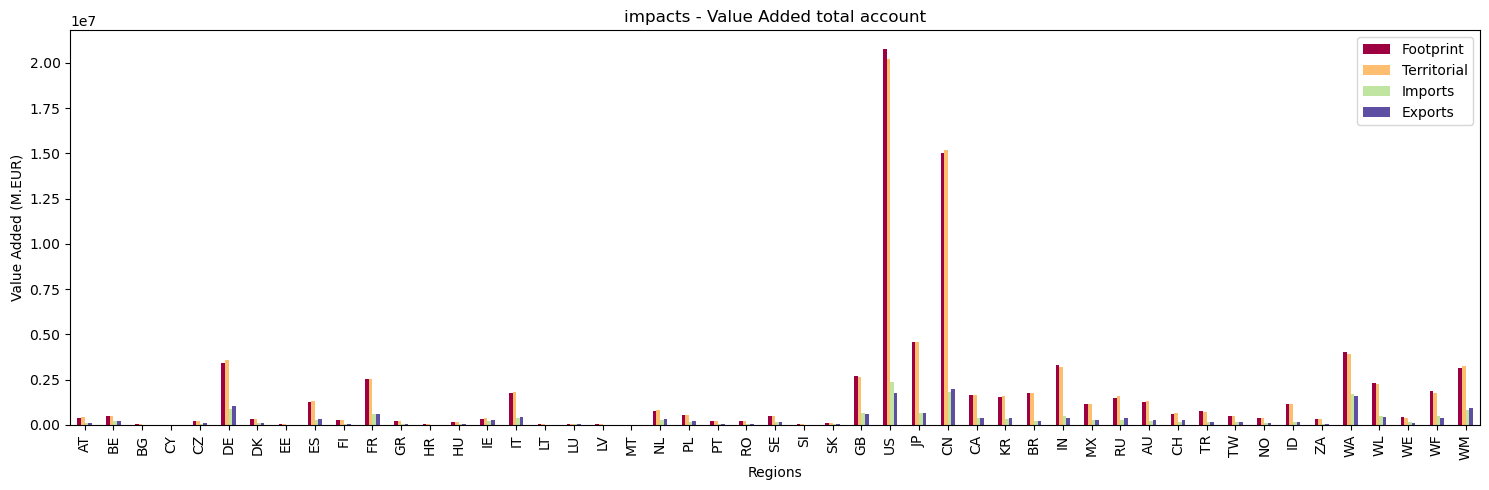

In [27]:
exio3.impacts.plot_account(['Value Added'], figsize=(15, 5))

#### GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)

<Axes: title={'center': 'impacts - GHG emissions GWP100 | Problem oriented approach: baseline CML, 2001 | GWP100 IPCC, 2007 total account'}, xlabel='Regions', ylabel='GHG emissions GWP100 | Problem oriented approach: baseline CML, 2001 | GWP100 IPCC, 2007 (kg CO2 eq.)'>

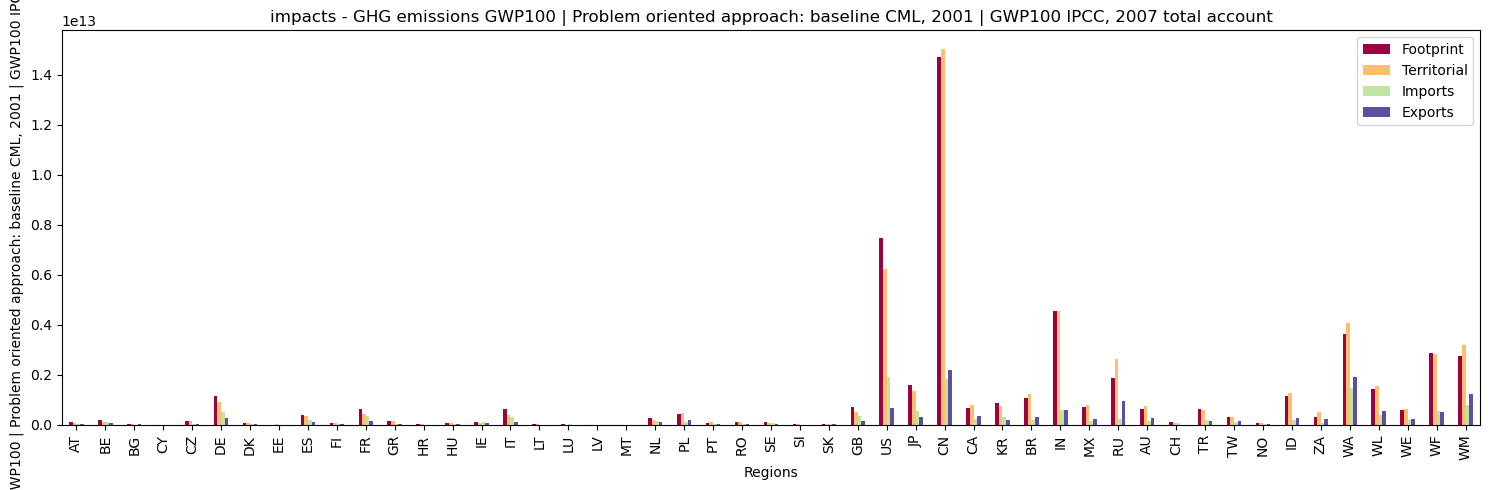

In [30]:
exio3.impacts.plot_account(['GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)'], figsize=(15, 5))

## 5. CO2 analysis in the Supply chain

In [61]:
import pandas as pd

# Function to analyze top inputs with CO₂ impact for a selected region and sector in exio3.Z
# showing the top 10 with their percentages and grouping the rest as "Others"
def analyze_top_inputs_with_co2_impact(Z, F, region, sector, top_n=10):
    # Select the column corresponding to the desired region and sector in exio3.Z
    inputs = Z[(region, sector)]
    
    # Select the corresponding CO₂ impact data for the region and sector from exio3.impacts.F
    co2_impact_data = F.loc["GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)"]
    
    # Drop all zero values to keep only non-zero inputs
    non_zero_inputs = inputs[inputs != 0]
    
    # Sort the values in descending order and get the top N values
    top_inputs = non_zero_inputs.sort_values(ascending=False).head(top_n)
    
    # Calculate the total sum of all non-zero input values for the selected region and sector
    total_sum = non_zero_inputs.sum()
    
    # Calculate percentage for the top N inputs
    top_inputs_percentage = (top_inputs / total_sum) * 100
    
    # Get corresponding CO₂ impacts for the top inputs
    co2_impacts_top = co2_impact_data[top_inputs.index]
    
    # Calculate the sum and percentage for "Others" (all remaining inputs)
    others_sum = total_sum - top_inputs.sum()
    others_percentage = (others_sum / total_sum) * 100
    others_co2_sum = co2_impact_data[non_zero_inputs.index.difference(top_inputs.index)].sum()
    
    # Create a Series for "Others"
    others_series = pd.Series({"Others": others_sum})
    others_percentage_series = pd.Series({"Others": others_percentage})
    others_co2_series = pd.Series({"Others": others_co2_sum})
    
    # Concatenate top inputs with "Others" row
    combined_inputs = pd.concat([top_inputs, others_series])
    combined_percentage = pd.concat([top_inputs_percentage, others_percentage_series])
    combined_co2_impacts = pd.concat([co2_impacts_top, others_co2_series])
    
    # Create a DataFrame with values, percentages, and CO₂ impacts
    result = pd.DataFrame({
        'Input Value': combined_inputs,
        'Percentage of Total (%)': combined_percentage,
        'CO₂ Impact (kg CO₂)': combined_co2_impacts
    })
    
    return result

# Example usage
region_to_study = "DE"  # Replace with the desired region code
sector_to_study = "Aluminium and aluminium products"  # Replace with the desired sector name

# Call the function and display the result
result = analyze_top_inputs_with_co2_impact(exio3.Z, exio3.impacts.F, region_to_study, sector_to_study, top_n=10)
print("Top 10 non-zero input values with CO₂ impact for the selected region and sector, with percentages:")
result


Top 10 non-zero input values with CO₂ impact for the selected region and sector, with percentages:


,Input Value,Percentage of Total (%),CO₂ Impact (kg CO₂)
"(DE, Other business services (74))",847.315811,5.441363,2.889187e+10
"(DE, Aluminium and aluminium products)",775.936293,4.982972,1.637817e+09
"(DE, Wholesale trade and commission trade services, except of motor vehicles and motorcycles (51))",676.762230,4.346088,1.407893e+09
"(DE, Other land transportation services)",596.236212,3.828959,1.727983e+09
"(DE, Secondary raw materials)",515.726673,3.311936,2.406553e+09
"(FR, Aluminium and aluminium products)",436.695400,2.804407,2.286733e+08
"(WA, Chemicals nec)",427.591033,2.745939,1.261687e+11
"(DE, Retail trade services, except of motor vehicles and motorcycles; repair services of personal and household goods (52))",407.140215,2.614607,3.913193e+08
"(IT, Aluminium and aluminium products)",392.433768,2.520164,6.202103e+08
"(RU, Other non-ferrous metal products)",369.759700,2.374553,1.941854e+09
